In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from pykdf.kdf import load_kdf

import os, sys
import numpy as np

In [6]:
# -- results
file_name = "../data/test/bm_2.hdf5"
res = load_kdf(file_name)

ys = res['ys']
times = res['times']
tmax = times.max()

# rates
idx_r = res['idx_R']
rates = ys[:, idx_r]
stim = res['stim']

# -- params
execfile("../pars/pars_bluemass_2.py")
pars = BMparams(pops, conns, backs, inputs, sigma=0, background_res=0)

(1000, 302) [282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300]


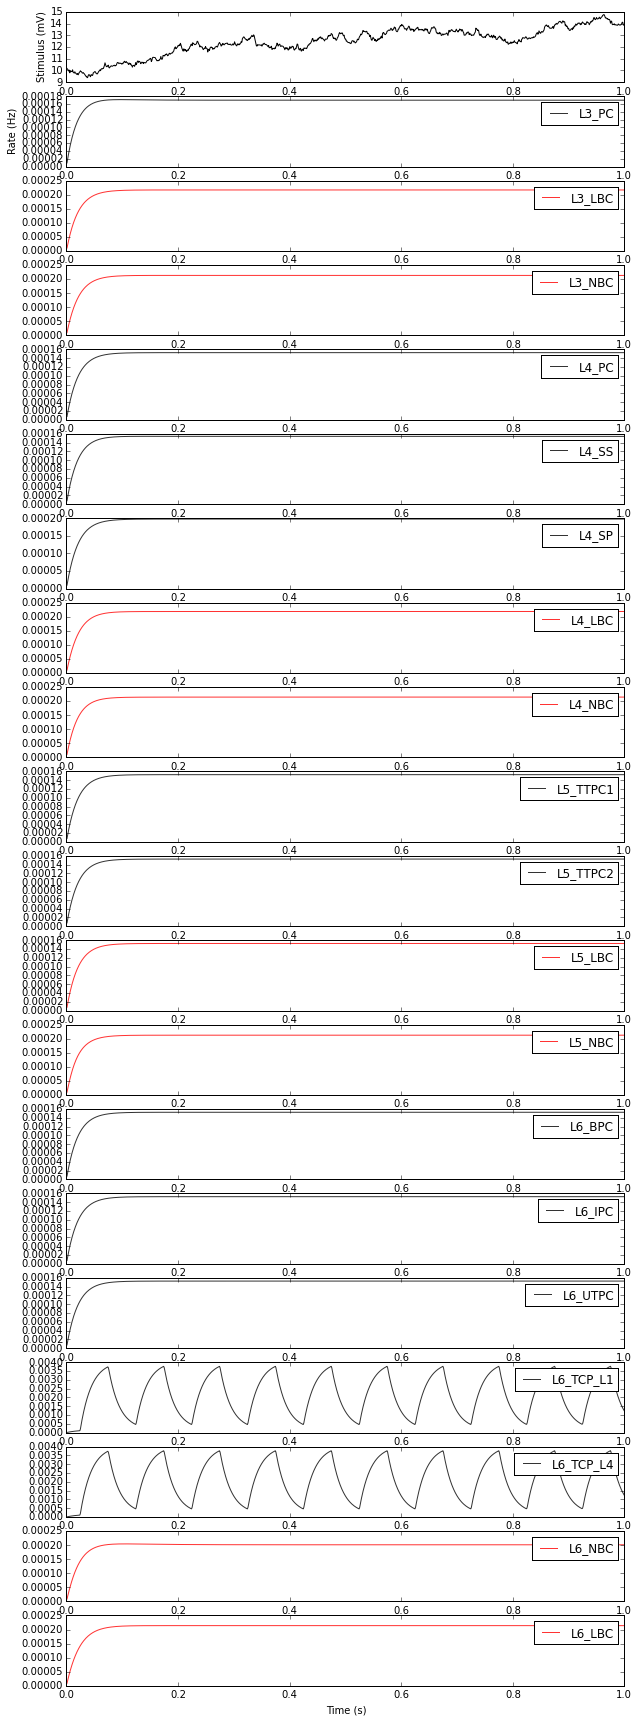

In [3]:
plt.figure(figsize=(10, 30))
nplot = len(pops) + 1

m = times > 0

n = 1
plt.subplot(nplot, 1, n)
plt.plot(times[m[:-1]], stim[m[: -1]], label='Stimulus', color='k')
# plt.ylim(0.9e-8, 1.2e-8)
plt.xlim(0, tmax)
plt.ylabel("Stimulus (mV)")

for k, (pop, pars) in enumerate(pops):
    c_pop = 'k'
    if pars['type'] == 'I':
        c_pop = 'r'
    
    n += 1
    plt.subplot(nplot, 1, n)
    plt.plot(times[m], rates[m, k], color=c_pop, alpha=0.8, label=pop)

#     plt.xlim(0, tmax)
    if n == 2:
        plt.ylabel("Rate (Hz)")
    plt.legend()
#     plt.ylim(0, 200)

plt.xlabel("Time (s)")